# Accessing an APOGEE Spectrum with sdss-access

## Learning Goals
By the end of this tutorial, you will:
- Understand how to read in SDSS BOSS spectra of quasars
- Become familiar with computed parameters of quasar spectra
- Shift spectra to rest wavelength

## Introduction
<p>In this notebook we are going to take a look at a type of astronomical obsects known as quasars. Quasars are powered by supermassive black holes that lie in the heart of distant galaxies. They are visible as gas falling towards the black hole forms a fast-moving, hot disk that shines so brightly it can be seen in the furthest reaches of the universe.  </p>
<p>We will study these quasars by looking at their spectra. A spectrum measures the intensity of light in many different wavelengths (colors of light). We will be using data from the Sloan Digital Sky Survey which has measured the spectra of millions of astronomical objects.</p>
<p>You will need to download spectra for the three objects in this tutorial. Here we have assumed they are saved in a subdirectory/folder called "BHM_spectra", but you may choose to point to your Downlaods folder or move the spectra to the same directory as this notebook for simplicity.</p>
<ul>
<li><a href="https://data.sdss5.org/sas/dr19/spectro/boss/redux/v6_1_3/spectra/lite/015173/59381/spec-015173-59381-4351098892.fits">Object 1</a></li>
<li><a href="https://data.sdss5.org/sas/dr19/spectro/boss/redux/v6_1_3/spectra/lite/015301/59314/spec-015301-59314-4602374937.fits">Object 2</a></li>
<li><a href="https://data.sdss5.org/sas/dr19/spectro/boss/redux/v6_1_3/spectra/lite/015023/59232/spec-015023-59232-4555307714.fits">Object 3</a></li>
</ul>

## Imports
This tutorial requires two commonly used python packages, and an SDSS specific package
- _numpy_ for doing math
- _matplotlib_ for plotting
- _astropy_ for reading fits table

Missing packages can be installed via `pip install numpy matplotlib astropy` 

<p>Let's start by importing some libraries.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
# for plots
from matplotlib import rc

<p>We will need to load the data from files for individual spectra of objects. Here we load our first object.</p>

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

current_path=os.getcwd()
object1_filename=current_path+'/BHM_spectra/spec-015173-59381-4351098892.fits'
object1_data = Table.read(object1_filename, format='fits',hdu=1)


<p>Now let's look at our data for our first object.</p>

In [3]:
object1_data

FLUX,LOGLAM,IVAR,AND_MASK,OR_MASK,WDISP,SKY,MODEL,WRESL
10^-17 ergs/s/cm^2/Angs,log10(Angs),,,,Pixels,10^-17 ergs/s/cm^2/Angs,,Angs
float32,float32,float32,int32,int32,float32,float32,float32,float32
57.025764,3.5523,0.0,88080384,88080384,0.0,0.0,20.047207,0.0
57.025764,3.5523999,0.0,88080384,88080384,0.0,0.0,20.061258,0.0
57.025764,3.5525,0.0,88080384,88080384,0.0,0.0,19.964983,0.0
57.025764,3.5526,0.0,88080384,88080384,0.0,0.0,19.916162,0.0
57.025764,3.5527,0.0,88080384,88080384,0.0,0.0,19.874899,0.0
57.025764,3.5528,0.0,88080384,88080384,0.0,0.0,19.90086,0.0
57.025764,3.5529,0.0,88080384,88080384,0.0,0.0,19.998386,0.0
57.025764,3.553,0.0,88080384,88080384,0.0,0.0,20.031792,0.0


<p>You can see we have multiple columns. The two we are most interested in are:
<ul>
    <li>The flux which measures the intensity of light received from this object at a particular wavelength</li>
    <li>The log of the wavelength (LOGLAM).</li>
</ul>
We can convert the second of these to make a new wavelength column as it's often easier to think in linear scales.</p>

In [4]:
object1_data['WAVELENGTH']=10.0**object1_data['LOGLAM']

<p>We can now make a plot of our first object</p>

<p>This is the spectrum of your object. On the left side is the flux in the bluest color your eye can see. The color of the light gets redder as we move with increasing wavelength to the right. On the furthest right end of the spectrum we have light too red for our eyes to see (the start of the infrared). </p>

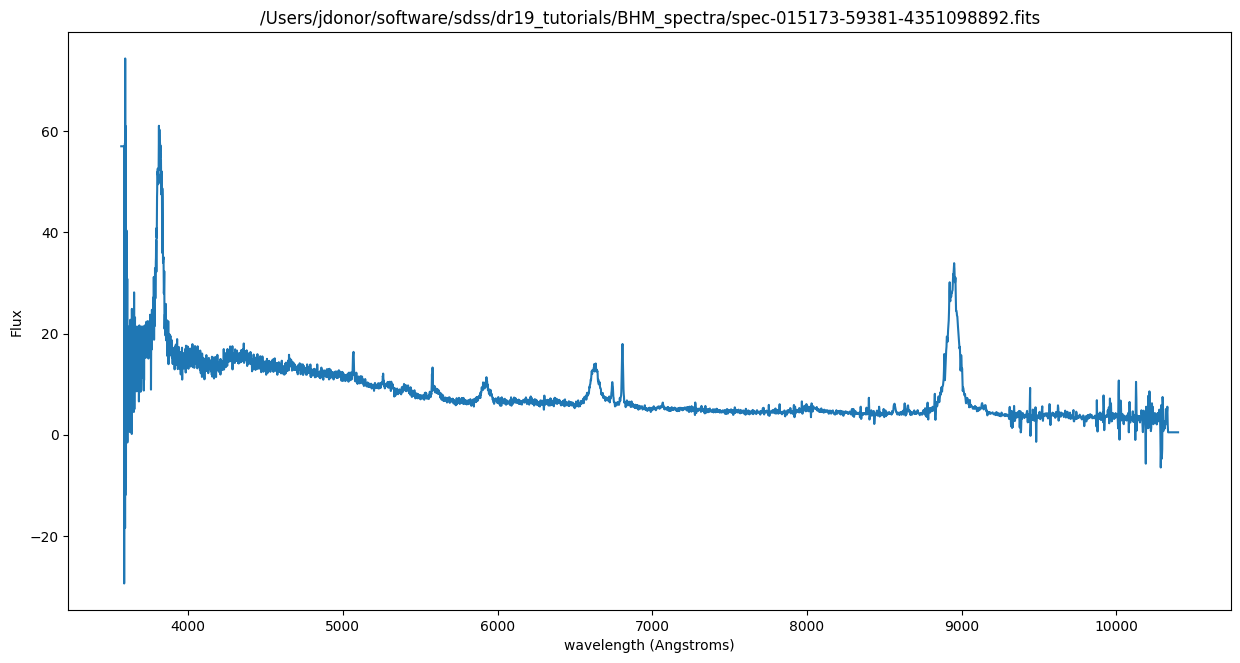

In [5]:
plt.figure(figsize=(15,7.5))
plt.plot(object1_data['WAVELENGTH'],object1_data['FLUX'])
plt.title(object1_filename)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('Flux')
plt.show()

<p>Sometimes a spectrum comes with regions of bad data caused by things like cosmic rays hitting the detector or for reasons related to the spectrograph. Luckily, the SDSS pipeline marks pixels that may have been affected by issues like this. We can mask out the worst of this data by doing filtering for pixels which are marked as having no issues. </p>

In [6]:
object1_mask_pixels =(object1_data['AND_MASK']==0)

<p>Now let's redo our plot showing only pixels that we didn't mask out.</p>

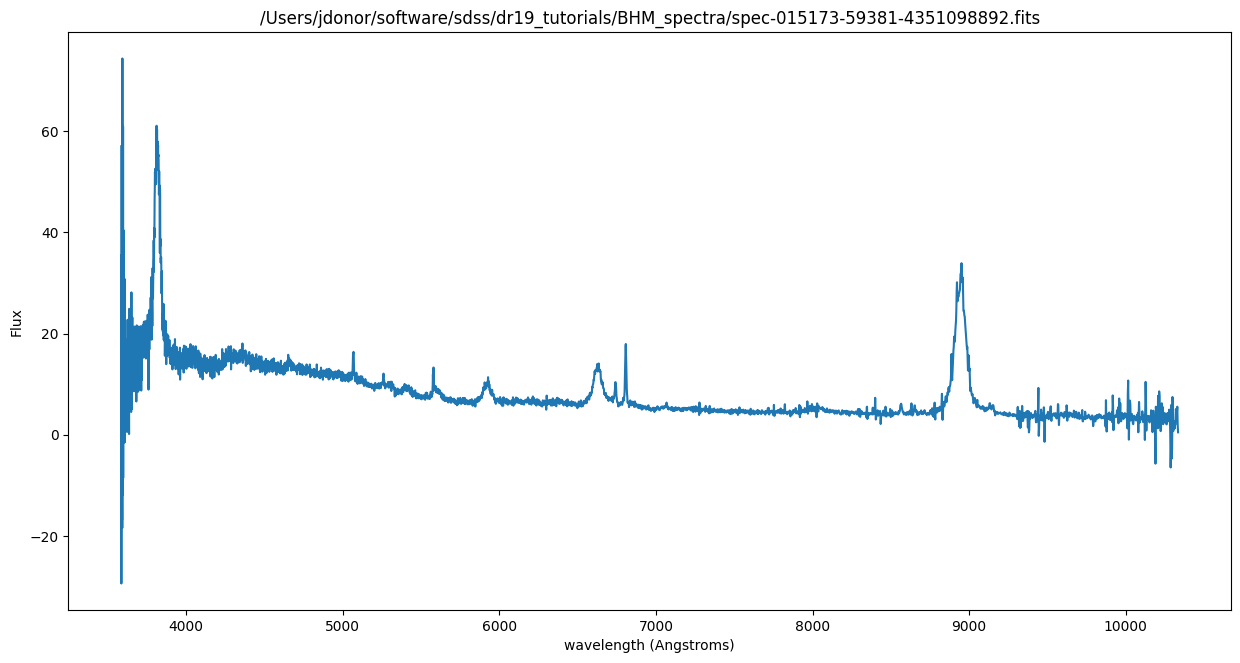

In [7]:
plt.figure(figsize=(15,7.5))
plt.plot(object1_data[object1_mask_pixels]['WAVELENGTH'],object1_data[object1_mask_pixels]['FLUX'])
plt.title(object1_filename)
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('Flux')
plt.show()

**Exercise:**
Do you notice any changes between the masked and the unmasked spectra?

**Exercise:**
Have a look at your masked spectrum and answer the following questions:
<ul>
    <li>What is the overall shape of the spectrum?</li>
    <li>Where do you find the biggest deviations from this overall shape?</li>
    <li>What is the biggest of these deviations from the overall shape?</li>
</ul>
</p>

<p>In spectroscopy we typically talk an object having "continuum" that marks the general shape of the object's spectrum. Peaks above this continuum are known as emission lines and valleys below continuum are known as absorption lines.<br/>

**Exercise**
<ul>
<li>What do you think is the continuum in your spectrum?</li>
<li>Can you see emission or absorption lines?</li>
</ul>
</p>

**Exercise:**
Load the data for the following files using similar code the what we used for the first object. Create pixel masks for both of these objects to remove bad data.

In [8]:
object2_filename=current_path+'/BHM_spectra/spec-015301-59314-4602374937.fits'

object3_filename=current_path+'/BHM_spectra/spec-015023-59232-4555307714.fits'


<p>Now make three plots of the three spectra. You can put your plotting code in the cell below.</p>

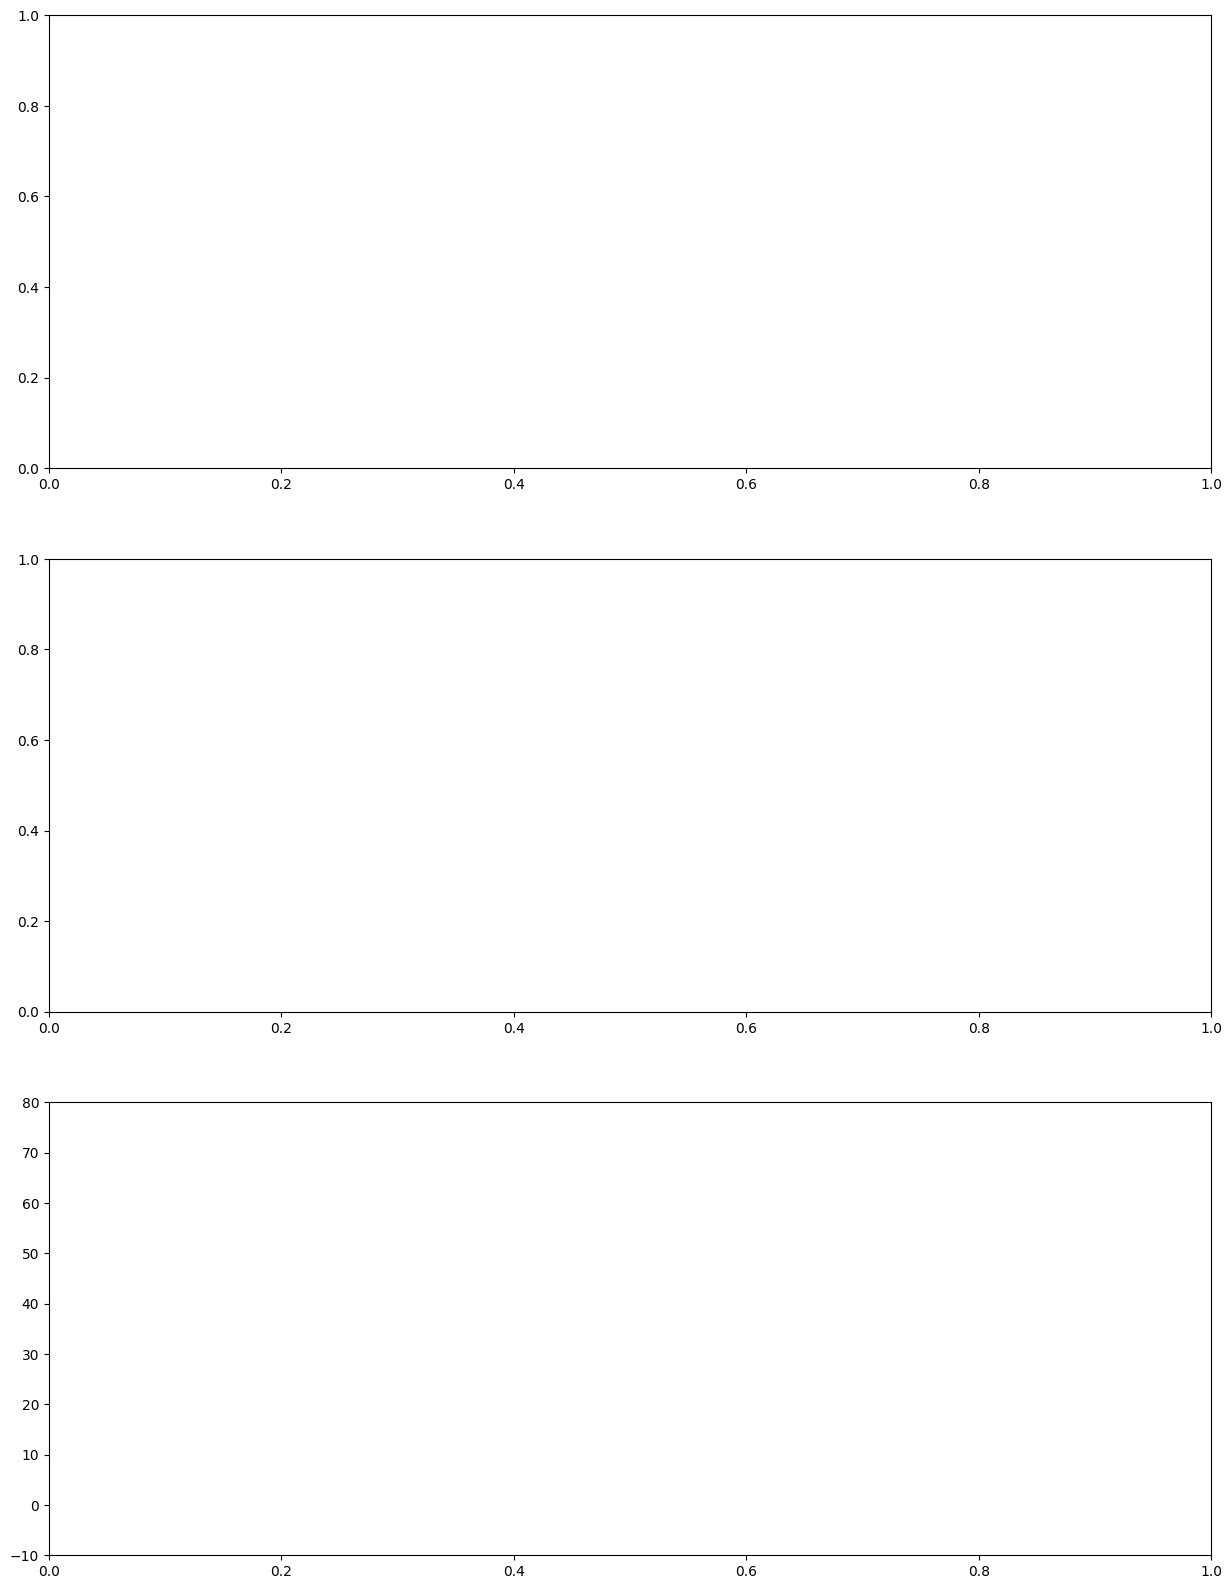

In [9]:
plt.figure(figsize=(15,20))
plt.subplot(3,1,1)
#object1 plotting code goes here



plt.subplot(3,1,2)
#object2 plotting code goes here



plt.subplot(3,1,3)
#object3 plotting code goes here
# there is an issue with this spectrum at the very blue end, we can ignore it and manually change the y axis
plt.ylim(-10,80) 


plt.show()

<p>Let's take a look at some of the features of the three spectra.</p>
<p>Take the biggest emission line in each spectrum. This should be the triangular-shaped line that is the highest above the continuum. What differs between the stongest emisson line in each spectrum?</p>
<p>Take the group of three emission lines between 6500A and 7000A on the spectrum of object 1. Do you see a similar pattern somewhere in the spectrum of object 2, what is different about that feature?<br/>Can you find a similar feature in the spectrum of object 3?</p>

<p>The SDSS pipeline doesn't just produce a spectrum of the object. It also uses that spectrum to measure lots of parameters relating to the object. It's quite easy to access these. We can do this by doing the following:</p>

In [10]:
object1_pipeline_data = Table.read(object1_filename, format='fits',hdu=2)

<p>Now we can have a look at the columns.</p>

In [11]:
object1_pipeline_data.colnames

['FIELD',
 'MJD',
 'OBS',
 'MJD_FINAL',
 'MJD_LIST',
 'TAI_LIST',
 'RUN2D',
 'RUN1D',
 'DESIGNS',
 'CONFIGS',
 'NEXP',
 'EXPTIME',
 'TARGET_INDEX',
 'FIBERID_LIST',
 'SPEC_FILE',
 'PROGRAMNAME',
 'SURVEY',
 'CADENCE',
 'FIRSTCARTON',
 'CARTON_TO_TARGET_PK',
 'SDSS5_TARGET_FLAGS',
 'OBJTYPE',
 'CATALOGID',
 'CATALOGID_V0',
 'CATALOGID_V0P5',
 'SDSS_ID',
 'SPECOBJID',
 'CALIBFLUX',
 'CALIBFLUX_IVAR',
 'OPTICAL_PROV',
 'MAG',
 'PSFMAG',
 'FIBER2MAG',
 'CATDB_MAG',
 'GAIA_G_MAG',
 'GRI_GAIA_TRANSFORM',
 'BP_MAG',
 'RP_MAG',
 'GAIA_ID',
 'WISE_MAG',
 'TWOMASS_MAG',
 'GUVCAT_MAG',
 'EBV',
 'EBV_TYPE',
 'FIBER_RA',
 'FIBER_DEC',
 'PLUG_RA',
 'PLUG_DEC',
 'RACAT',
 'DECCAT',
 'COORD_EPOCH',
 'PMRA',
 'PMDEC',
 'PARALLAX',
 'RA_LIST',
 'DEC_LIST',
 'DELTA_RA_LIST',
 'DELTA_DEC_LIST',
 'FIBER_OFFSET',
 'XFOCAL',
 'YFOCAL',
 'ZOFFSET',
 'LAMBDA_EFF',
 'BLUEFIBER',
 'HEALPIX',
 'HEALPIXGRP',
 'HEALPIX_PATH',
 'FIELDQUALITY',
 'EXP_DISP_MED',
 'FIELDSN2',
 'FIELDSNR2G_LIST',
 'FIELDSNR2R_LIST',
 'F

<p>There are many columns, too many to go into here. They cover parameters measured from the spectrum to important bits of information about the spectrum such as the exposure time and the moon phase when it was observed.</p>

<p>What we are interested in is a parameter labeled "z". Let's have a look at that parameter and its error.</p>

In [12]:
object1_z=object1_pipeline_data[0]['Z']
object1_z_err=object1_pipeline_data[0]['Z_ERR']
print('z='+str(object1_z)+' +/- '+str(object1_z_err))

z=0.36250922 +/- 5.620322e-05


<p>This parameter is called redshift. In an expanding universe, distant objects appear to be moving away from us. The further away the object, the faster they appear to be moving away. The further away they are, the faster they appear to be moving away from us. This changes the spectrum of the objects, moving spectra features to longer, redder wavelengths (hence redshift).</p>

<p>The observed wavelength of a spectral feature is related to the wavelength it had when it was emitted (the rest wavelength) by the following relation</p>
<p>$\lambda_{obs}=(1+z)\lambda_{rest}$</p>

**Exercise:** Extract the redshift from the pipeline data for objects 2 and 3. Then add a new column to the spectra for objects 1, 2 and 3 called "WAVELENGTH_REST". This should be the wavelength of that pixel corrected for the redshift. Then remake your plots of the three spectra.<br/>HINT: use plt.xlim(2000,8000) for each of your plots so they cover the same wavelength range.</p>

In [13]:
# code

**Exercise:**
<ul>
<li>What do you notice about the lines you previously looked at. Do you still see the same changes as before?</li>
<li>What about the big line in object 1 that has a wavelength of roughly 9000A before correction for redshift? Do you see this in the other objects? If not why not?</li>
</ul>

<p>Below is an example spectrum of a quasar (credit Vanden Berk et al. 2001). On it are marked several lines that are often prominent in quasar spectra. Which lines to you see in each of your spectra?</p>

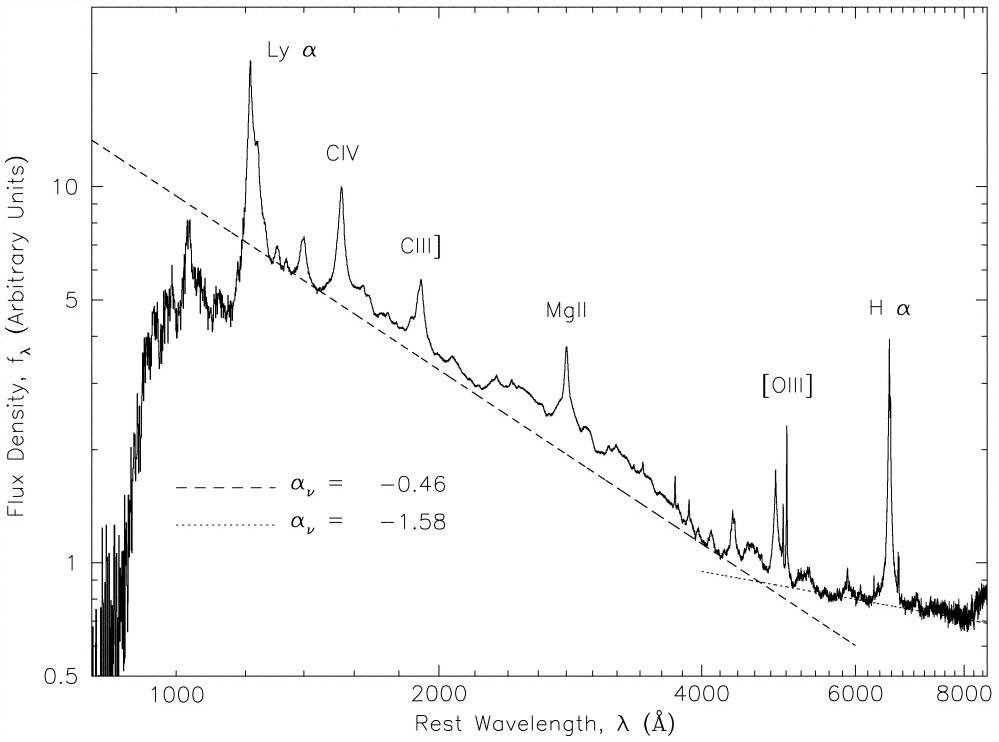

<p>So you've had a look at the spectra of quasars and seen how redshift can change what they look like when we observe them. Now lets have a look at several spectra of the same quasar taken in different years.</p>

<p>Next we need to add a grab a few more spectra of object 1. Add them to the same directory as before.</p>
<ul>
<li><a href="https://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=7339&mjd=56799&fiberid=611">Object 1 spectrum B</a></li>
<li><a href="https://dr18.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=7339&mjd=57518&fiberid=611">Object 1 spectrum C</a></li>
</ul>

<p>First let's load in the spectra. Note one small change, with these older spectra the column names are lower case.</p>

In [14]:
object1b_filename=current_path+'/BHM_spectra/spec-7339-57518-0611.fits'
object1b_data = Table.read(object1b_filename, format='fits',hdu=1)
object1c_filename=current_path+'/BHM_spectra/spec-7339-56799-0611.fits'
object1c_data = Table.read(object1c_filename, format='fits',hdu=1)
object1b_mask_pixels =(object1b_data['and_mask']==0)
object1b_data['WAVELENGTH']=10.0**object1b_data['loglam']
object1c_mask_pixels =(object1c_data['and_mask']==0)
object1c_data['WAVELENGTH']=10.0**object1c_data['loglam']

**Exercise:**
    <ul>
    <li>Plot the three spectra of object 1 (called object1, object1b and object1c) on the same axes. Give these the colors limegreen, blue and red. Add "Epoch Comparison as the title".</li>
    </ul>

In [15]:
# code

<p>Now let's look at when these spectra were taken. The date they were taken is actually in the file name for each. The spectrum filename has the form <code>spec-<plate_number>-date-fiber-number.fits</code>.</p>
<p>But, that number doesn't look like a date. That's because it's in a slight odd formatting used by astronomers called a Modified Julian Date (MJD). This is a modification to a dating system with a rather strange origin. Put simply, that number is the number of days since the 17th of November 1858.</p>
    <p>To make life easier here's a little function to convert MJD to a more familiar format.</p>

In [16]:
def mjd_to_year(mjd):
    from astropy.time import Time
    time_tmp = Time(mjd, format='mjd') 
    return time_tmp.iso

**Exercise:**
    <ul>
    <li>Convert the Modified Julian Dates for your three spectra into a more readable format</li>
    <li>Label each of lines on your plot with the date that spectrum was taken</li>
    <li>Add a legend to your plot using a call to plt.legend()</li>
    </ul>

In [17]:
# code

**Exercise:**
    <ul>
    <li>Take a look at the three spectra. What can you say about the different spectra?
        <ul>
            <li>How does the level of the continuum change?</li>
            <li>How do the positions, heights and shapes of most of the spectral lines change?</li>
        </ul>
    <li>Given what was mentioned at the start of this notebook about what powers quasars, what do you think could be happening?</li>
    </ul>

## About this notebook
This notebook was created to illustrate how to find and use the various Coadds of the SDSS-V BOSS spectra

**Authors**: Niall Deacon

*Editing:* John Donor

**Last Update**: 2025 June 26

If you use `astropy`  for published research, please cite the
authors. Follow this link for more information about citing `astropy`:

* [Citing `astropy`](https://www.astropy.org/acknowledging.html)

And of course, please [cite](https://sdss.org/collaboration/citing-sdss/) SDSS when you use our data.